In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
covid = pd.read_csv('cleaned-data.csv', engine = 'python', index_col=0)

In [4]:
covid

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
Fever,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,0,1,1,1,1,0,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,0,1,1,1,1,0,...,1,0,1,0,0,0,0,1,0,China
1,1,1,1,1,0,1,1,1,1,0,...,1,0,1,0,0,0,1,0,0,China
1,1,1,1,1,0,1,1,1,1,0,...,1,0,0,1,0,0,0,0,1,China
1,1,1,1,1,0,1,1,1,1,0,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,Other
0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,Other
0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,Other


In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316800 entries, 1 to 0
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Tiredness                316800 non-null  int64 
 1   Dry-Cough                316800 non-null  int64 
 2   Difficulty-in-Breathing  316800 non-null  int64 
 3   Sore-Throat              316800 non-null  int64 
 4   None_Sympton             316800 non-null  int64 
 5   Pains                    316800 non-null  int64 
 6   Nasal-Congestion         316800 non-null  int64 
 7   Runny-Nose               316800 non-null  int64 
 8   Diarrhea                 316800 non-null  int64 
 9   None_Experiencing        316800 non-null  int64 
 10  Age_0-9                  316800 non-null  int64 
 11  Age_10-19                316800 non-null  int64 
 12  Age_20-24                316800 non-null  int64 
 13  Age_25-59                316800 non-null  int64 
 14  Age_60+                  

In [7]:
x = covid.iloc[:,1:11]

In [8]:
y = covid.iloc[:,0]

In [9]:
x.head()

,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9
Fever,,,,,,,,,,
1,1,1,1,0,1,1,1,1,0,1
1,1,1,1,0,1,1,1,1,0,1
1,1,1,1,0,1,1,1,1,0,1
1,1,1,1,0,1,1,1,1,0,1
1,1,1,1,0,1,1,1,1,0,1


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.75, random_state=0)

In [12]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79200 entries, 0 to 0
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Dry-Cough                79200 non-null  int64
 1   Difficulty-in-Breathing  79200 non-null  int64
 2   Sore-Throat              79200 non-null  int64
 3   None_Sympton             79200 non-null  int64
 4   Pains                    79200 non-null  int64
 5   Nasal-Congestion         79200 non-null  int64
 6   Runny-Nose               79200 non-null  int64
 7   Diarrhea                 79200 non-null  int64
 8   None_Experiencing        79200 non-null  int64
 9   Age_0-9                  79200 non-null  int64
dtypes: int64(10)
memory usage: 6.6 MB


In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
tree = DecisionTreeClassifier(max_depth=3)

In [16]:
tree.fit(x, y)

DecisionTreeClassifier(max_depth=3)

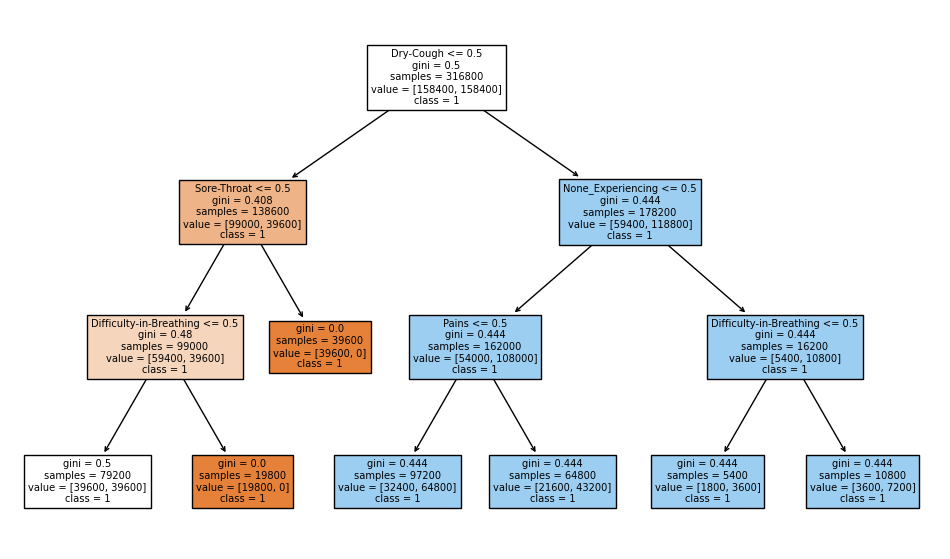

In [17]:
plt.figure(figsize=(12,7))
plot_tree(tree, feature_names=list(x.columns.values), class_names=list(np.array(y).astype(str)), filled=True)
plt.show()

In [18]:
y_pred = tree.predict(x_test)

In [19]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
cm = confusion_matrix(y_test, y_pred)

In [23]:
cm

array([[74270, 44469],
       [29625, 89236]], dtype=int64)

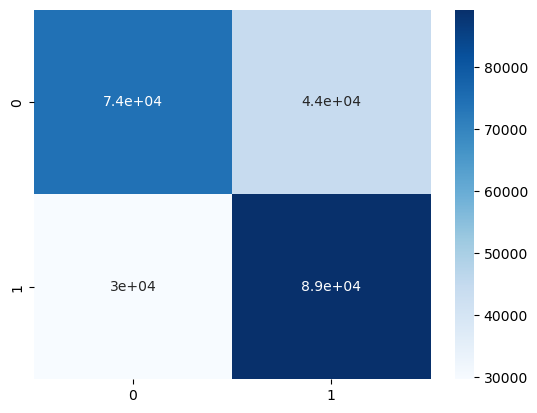

In [24]:
sns.heatmap(cm, annot=True, cmap="Blues")
plt.show()